In [1]:
import numpy as np
import matplotlib.pyplot as plt

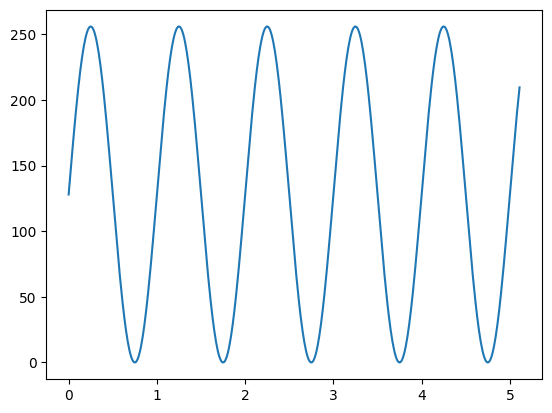

In [2]:
#1次元のsin波生成
A = 128    # 振幅
f = 1.0    # 周波数 Hz
sec = 5.12  # 信号の長さ s
sf = 100 # サンプリング周波数 Hz

t = np.arange(0, sec, 1/sf) #サンプリング点の生成
sin = A*np.sin(2*np.pi*f*t)+128 # 正弦波の生成

plt.plot(t, sin)

In [3]:
#2次元に引き延ばす
data = np.array([sin for _ in range(len(sin))]).T

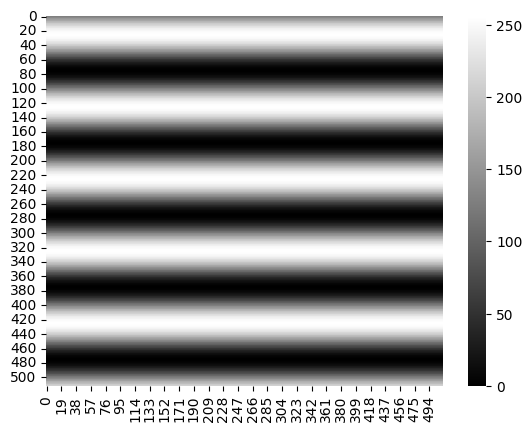

In [4]:
#ヒートマップにプロット
import seaborn as sns
sns.heatmap(data, cmap="gist_gray")
plt.savefig('sin_wave.jpg', )
plt.show()

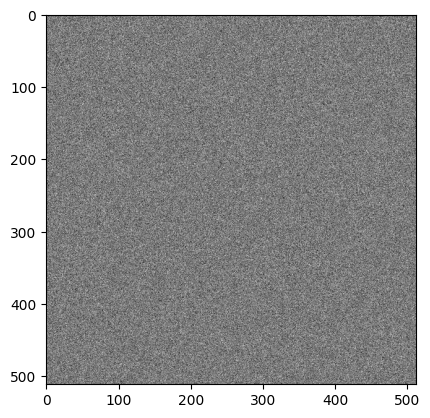

In [5]:
#ガウシアンノイズ生成
mean = 0
sigma = 100
noise = np.random.normal(0, sigma, np.shape(data))
# sns.heatmap(noise, cmap="gist_gray")
# plt.savefig('gauss_noise.jpg')
plt.imshow(noise, cmap='gray')
plt.show()

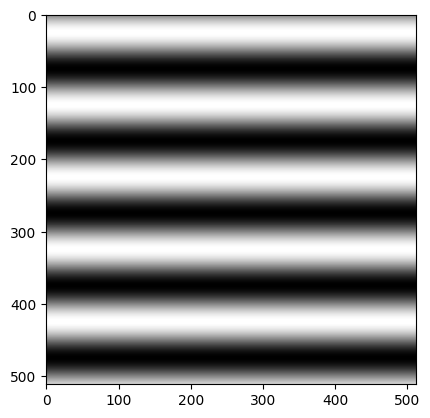

In [6]:
#データにノイズ付与
data = data

#はみ出したデータは校正
data[data > 255] = 255
data[data < 0] = 0
# sns.heatmap(data, cmap="gist_gray")
plt.imshow(data, cmap='gray')
plt.show()

In [7]:
#ICA(独立成分分析)
from sklearn.decomposition import FastICA

def fica(data:np.ndarray, n_components:int):
    ica = FastICA(n_components=n_components)
    # run ICA on image
    ica.fit(data)
    # reconstruct image with independent components
    data_ica = ica.fit_transform(data) #Reconstruct signals
    data_restored = ica.inverse_transform(data_ica) #分離した独立成分からデータを復元
    A_ = ica.mixing_ #Mixising matrix

    # fig, ax = plt.subplots(n_components, figsize=(10,2*n_components))
    for idx in range(n_components):
        temp_data = np.dot(data_ica[:,idx:idx+1],A_[:,idx:idx+1].T)+ica.mean_
        # sns.heatmap(temp_data,ax=ax[idx], cmap='gist_gray', vmax=255 ,vmin=0)
        plt.imshow(temp_data, cmap='gray')
        plt.show()
    # plt.show()
    # sns.heatmap(data_restored, cmap="gist_gray", vmax=255 ,vmin=0)
    

In [8]:
# fica(data, n_components=20)

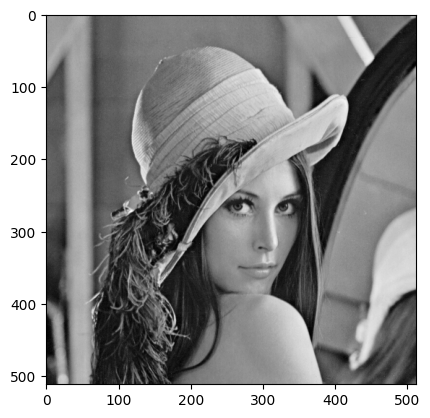

In [9]:
import cv2
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')

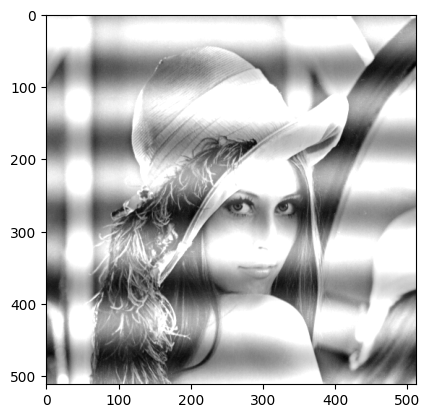

In [10]:
img_sin = img + data/2
#はみ出したデータは校正
img_sin[img_sin > 255] = 255
img_sin[img_sin < 0] = 0
plt.imshow(img_sin, cmap='gray')

In [11]:
# fica(img_sin, n_components=20)

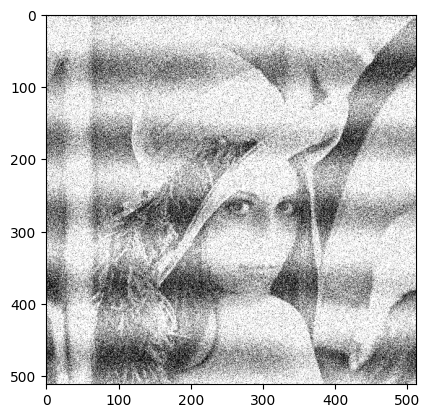

In [12]:
img_noise = img_sin + noise/2
#はみ出したデータは校正
img_noise[img_noise > 255] = 255
img_noise[img_noise < 0] = 0
plt.imshow(img_noise, cmap='gray')

/home/mmiyazaki/Documents_ubuntu/noise_cancel/noise_cancel_env/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/home/mmiyazaki/Documents_ubuntu/noise_cancel/noise_cancel_env/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


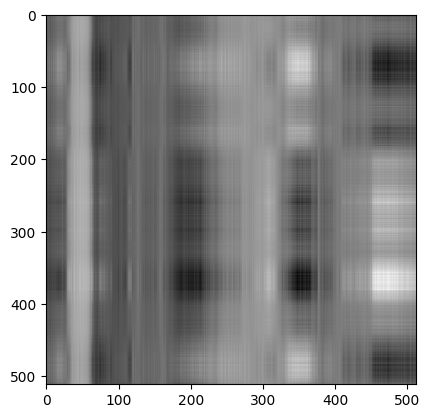

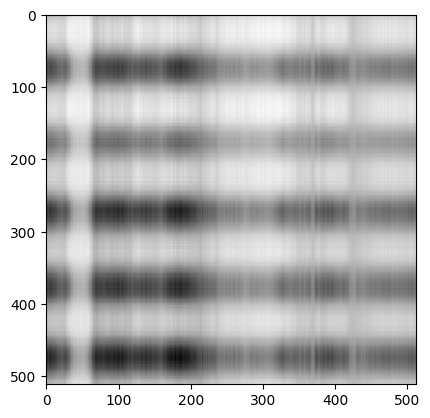

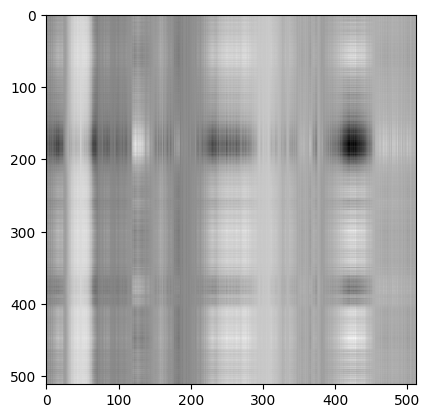

In [13]:
fica(img_noise, n_components=3)

In [14]:
from source.skica import ICA
from source.cdf import vlos_epoch_from_cdf
from source.plot import *
import numpy as np

In [15]:
list_data = [data, noise, img]
ica = ICA()
ica.read_sources(list_data)
ica.run()
# ica.plot()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
S_ = []
X = []
for i in range(ica.npics):
    s = ica.S_[:,i]
    s = scaler.fit_transform(s.reshape( (-1, 1) ) )
    s = np.reshape(s, ica.pic_size)
    S_.append(s)
    x = ica.X[:,i]
    x = scaler.fit_transform(x.reshape(-1,1))
    x = np.reshape(x, ica.pic_size)
    X.append(x)

reading images
cropping images
Image size: [512, 512]
Image total size: 262144
range of value: 0.0 -> 255.0
range of value: -433.76389745180666 -> 469.7132305076468
range of value: 39 -> 245
Shape of the source matrix: (262144, 3)
mixing matrix = 
[[ 1.00151851 -0.84726645 -0.58250589]
 [-1.27579177  1.07832739  0.96924205]
 [-1.25962486  0.0281098  -1.57258561]]
starting ICA


/home/mmiyazaki/Documents_ubuntu/noise_cancel/noise_cancel_env/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ICA done in 0.426919s.


<Figure size 3000x3000 with 0 Axes>

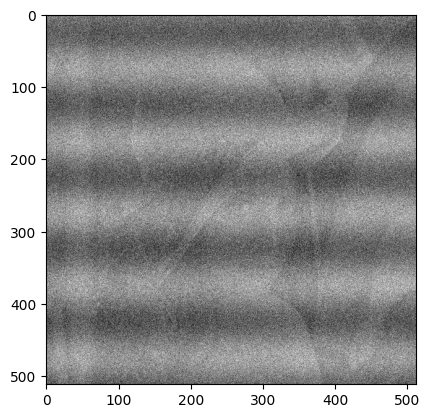

In [16]:
plt.imshow(X[0], cmap='gray_r')

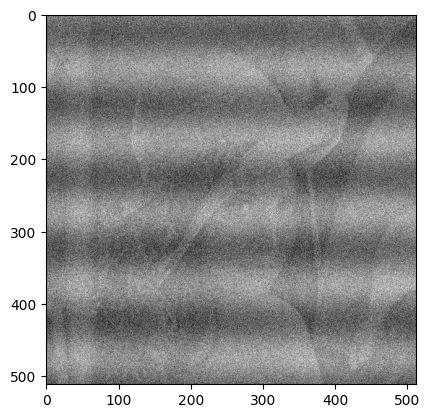

In [17]:
plt.imshow(X[1], cmap='gray')

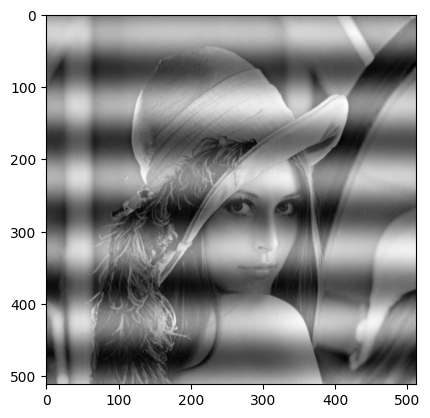

In [18]:
plt.imshow(X[2], cmap='gray_r')

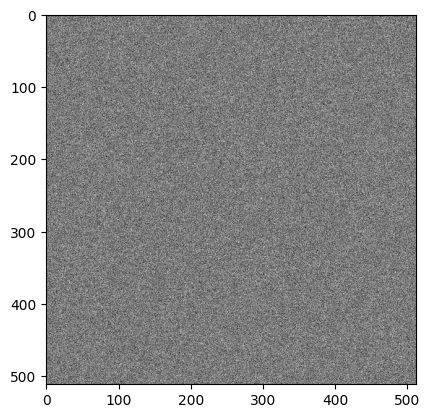

In [19]:
plt.imshow(S_[0], cmap='gray')

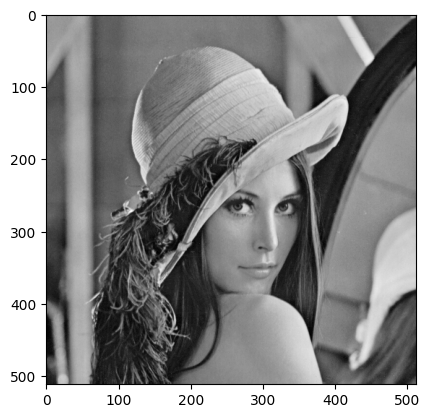

In [20]:
plt.imshow(S_[1], cmap='gray_r')

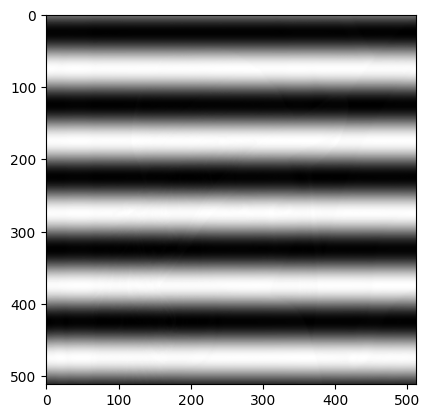

In [21]:
plt.imshow(S_[2], cmap='gray')

In [22]:
mask = np.array([[(True) if i > len(data[0])//2 else (False) for i in range(len(data[0]))] for _ in range(len(data))])

In [23]:
list_masked_data = []
for d in list_data:
    masked_data = np.ma.masked_where(mask, d)
    list_masked_data.append(masked_data)

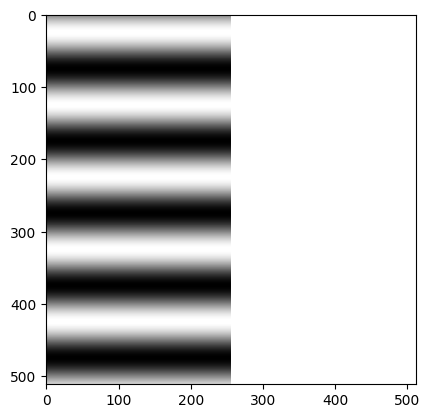

In [24]:
plt.imshow(list_masked_data[0], cmap='gray')

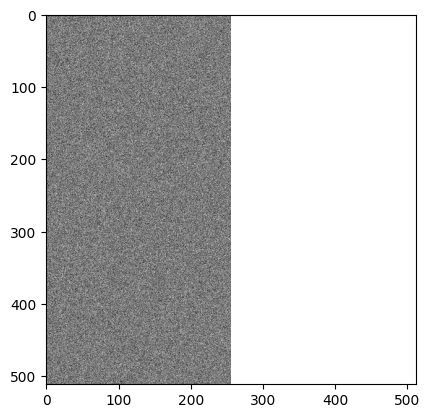

In [25]:
plt.imshow(list_masked_data[1], cmap='gray')

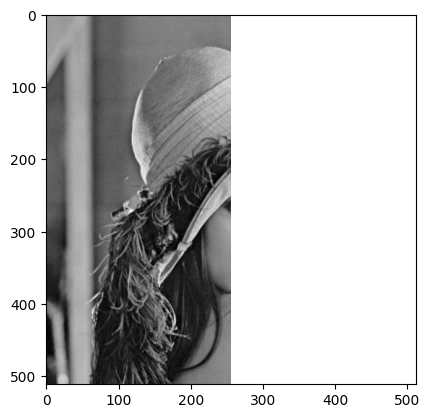

In [26]:
plt.imshow(list_masked_data[2], cmap='gray')

In [27]:
masked_ica = ICA()
masked_ica.read_sources(list_masked_data)
masked_ica.run()
# ica.plot()

reading images
cropping images
Image size: [512, 512]
Image total size: 262144
range of value: 0.0 -> 255.0
range of value: -433.76389745180666 -> 469.7132305076468
range of value: 39 -> 245
Shape of the source matrix: (262144, 3)
mixing matrix = 
[[ 1.00151851 -0.84726645 -0.58250589]
 [-1.27579177  1.07832739  0.96924205]
 [-1.25962486  0.0281098  -1.57258561]]
starting ICA


/home/mmiyazaki/Documents_ubuntu/noise_cancel/noise_cancel_env/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


ICA done in 1.181210s.


<Figure size 3000x3000 with 0 Axes>

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 255))
masked_S_ = []
masked_X = []
for i in range(masked_ica.npics):
    # s = masked_ica.S_[:,i]
    # print('1',type(s))
    # s = scaler.fit_transform(s.reshape( (-1, 1) ) )
    # print('2',type(s))
    # s = np.reshape(s, masked_ica.pic_size)
    # print('3',type(s))

    x = masked_ica.X[:,i]
    x = x.reshape(-1,1)
    mask = ~x.mask
    x[mask] = (x[mask] - x[mask].min()) / (x[mask].max() - x[mask].min()) * (255 - 0) + 0 # scale
    x = np.reshape(x, masked_ica.pic_size)
    masked_X.append(x)

    s = masked_ica.S_[:,i]
    s = s.reshape(-1,1)
    # s = scaler.fit_transform(s)
    s[mask] = (s[mask] - s[mask].min()) / (s[mask].max() - s[mask].min()) * (255 - 0) + 0 # scale
    s = np.reshape(s, masked_ica.pic_size)
    masked_S_.append(s)


In [29]:
masked_ica.S_

array([[ 1.27958240e+02,  1.46238046e+02,  9.39466712e+01],
       [ 6.47545551e+01,  9.31141025e+01,  8.77395209e+01],
       [ 1.54517268e+02,  1.68163726e+02,  9.75647866e+01],
       ...,
       [ 1.57954999e-03, -2.67517117e-03, -1.60661349e-03],
       [ 1.82662991e-03, -2.42407876e-03, -1.62185503e-03],
       [ 2.18766687e-04, -3.67404783e-03, -1.74210210e-03]])

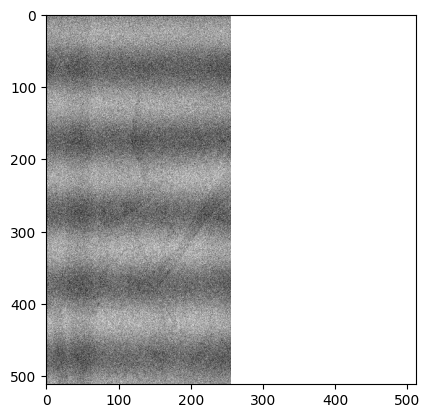

In [39]:
plt.imshow(masked_X[0], cmap='gray')

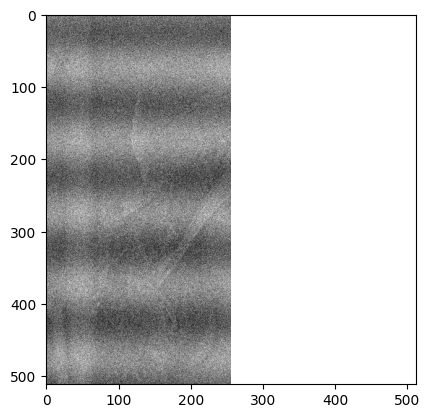

In [40]:
plt.imshow(masked_X[1], cmap='gray')

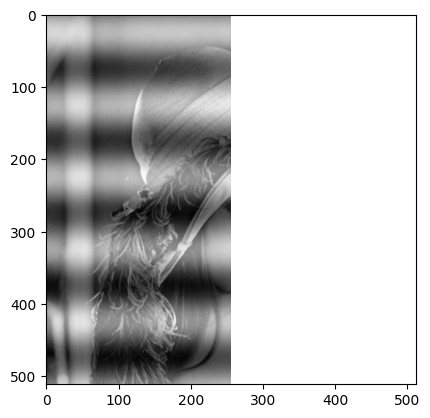

In [41]:
plt.imshow(masked_X[2], cmap='gray_r')

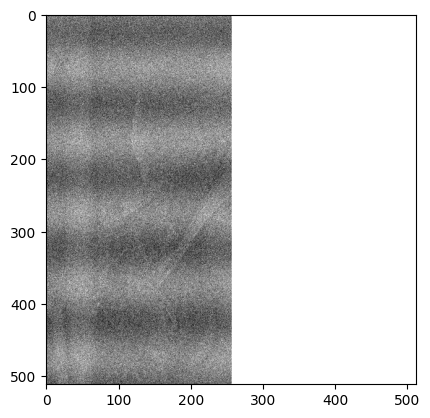

In [42]:
plt.imshow(masked_S_[0], cmap='gray_r')

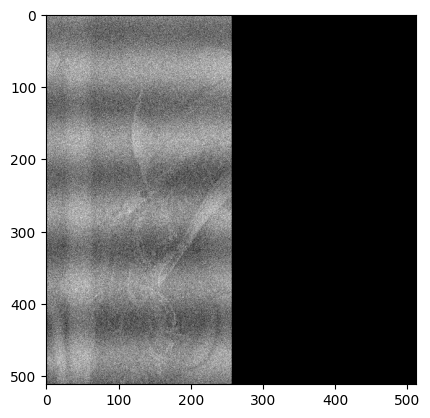

In [43]:
plt.imshow(masked_S_[1], cmap='gray')

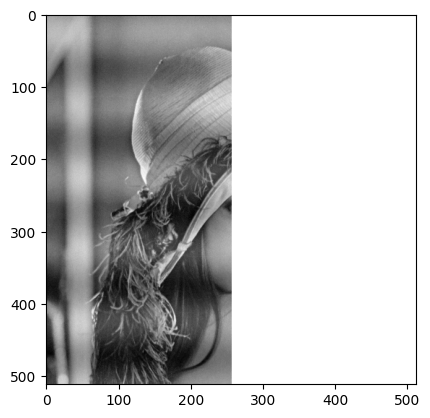

In [44]:
plt.imshow(masked_S_[2], cmap='gray_r')

In [45]:
# plt.imshow(np.ma.array(masked_S_[0],mask=masked_X[0].mask), cmap='gray_r')

In [46]:
# plt.imshow(np.ma.array(masked_S_[1],mask=masked_X[1].mask), cmap='gray_r')

In [47]:
# plt.imshow(np.ma.array(masked_S_[2],mask=masked_X[2].mask), cmap='gray_r')